In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')

### EDA

Посмотрим на типы данных, посчитаем пропуски в данных, посмотрим на количество уникальных значений в таблицах customers, orders, items.

#### customers — таблица с уникальными идентификаторами пользователей
* customer_id — позаказный идентификатор пользователя

* customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

* customer_zip_code_prefix —  почтовый индекс пользователя

* customer_city —  город доставки пользователя

* customer_state —  штат доставки пользователя

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers.isna().sum().to_frame()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [6]:
customers.nunique().to_frame()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


#### orders —  таблица заказов
* order_id —  уникальный идентификатор заказа (номер чека)

* customer_id —  позаказный идентификатор пользователя

* order_status —  статус заказа

* order_purchase_timestamp —  время создания заказа

* order_approved_at —  время подтверждения оплаты заказа

* order_delivered_carrier_date —  время передачи заказа в логистическую службу

* order_delivered_customer_date —  время доставки заказа

* order_estimated_delivery_date —  обещанная дата доставки

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Уникальные статусы заказов в таблице orders:

* created —  создан
* approved —  подтверждён
* invoiced —  выставлен счёт
* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю
* unavailable —  недоступен
* canceled —  отменён

In [9]:
columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',\
           'order_delivered_customer_date', 'order_estimated_delivery_date']

orders[columns] = orders[columns].apply(lambda x: pd.to_datetime(x, format=('%Y-%m-%d')))

In [10]:
orders.isna().sum().to_frame()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Заказы, у которых еще не была подтверждена оплата, будут с пропусками в order_approved_at. Все это строки со статусами canceled, delivered, created. Если заказ не оплачен или только создан, он может быть не оплачен, но если заказ не оплачен, то как он может быть доставлен? Тут скорее всего ошибка в данных, удалим строки где есть пропуски в order_approved_at и статус заказа delivered.

In [11]:
orders.order_status[orders.order_approved_at.isna()].unique()

array(['canceled', 'delivered', 'created'], dtype=object)

In [12]:
filt = orders.query('order_status == "delivered" and order_approved_at.isna()').order_id
orders = orders.query('order_id not in @filt')

Пропуски в order_delivered_carrier_date, то есть время передачи в логистическую компанию, у нас со статусами invoiced, processing, unavailable, canceled, created, approved, delivered. Если время не заполнено, то предполжим, что заказ еще не передали в логистическую компанию, такое может быть с заказами, которые созданы created и еще не оплачены invoiced, оплачены approved, в процессе сбора на складе processing, недоступны unavailable или отменены canceled, но доставленный delivered заказ не может быть одновременно не передан в в логистическую компанию. Удалим строки, где есть пропуски в order_delivered_carrier_date и статус заказа delivered.

In [13]:
orders.order_status[orders.order_delivered_carrier_date.isna()].unique()

array(['invoiced', 'processing', 'unavailable', 'canceled', 'created',
       'approved', 'delivered'], dtype=object)

In [14]:
filt = orders.query('order_status == "delivered" and order_delivered_carrier_date.isna()').order_id
orders = orders.query('order_id not in @filt')

Пропуски во времени доставки order_delivered_customer_date у нас есть со всеми статусами заказа, здесь можно предположить, что дата не указана, если товар не доставили. Такое может быть при любом статусе заказа, кроме delivered, не может же быть доставленный заказ, не доставлен одновременно. Удалим строки, где есть пропуски в order_delivered_customer_date и статус заказа delivered.

In [15]:
orders.order_status[orders.order_delivered_customer_date.isna()].unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [16]:
filt = orders.query('order_status == "delivered" and order_delivered_customer_date.isna()').order_id
orders = orders.query('order_id not in @filt')

In [17]:
orders.nunique().to_frame()

,0
order_id,99418
customer_id,99418
order_status,8
order_purchase_timestamp,98852
order_approved_at,90725
order_delivered_carrier_date,81006
order_delivered_customer_date,95649
order_estimated_delivery_date,459


#### items —  товарные позиции, входящие в заказы
* order_id —  уникальный идентификатор заказа (номер чека)

* order_item_id —  идентификатор товара внутри одного заказа

* product_id —  ид товара (аналог штрихкода)

* seller_id — ид производителя товара

* shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

* price —  цена за единицу товара

* freight_value —  вес товара

In [18]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [19]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'], format=('%Y-%m-%d'))

In [21]:
items.isna().sum().to_frame()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [22]:
items.nunique().to_frame()

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


По результатам исследования данных мы видим, что в таблице orders у нас есть пропущенные значения в столбцах: order_approved_at, order_delivered_carrier_date и  order_delivered_customer_date. Удалили строки, данные в которых противоречили логике.

Типы данных в столбцах с датами приведены к нужному типу datetime64[ns]. Из дополнительных особенностей можно отметить, что в таблице orders совпадает количество уникальных значений в столбцах order_id и customer_id, так как customer_idа таблице customers, значений customer_unique_id меньше, чем customer_id, это говорит о том, что у некоторых пользователей несколько заказов в наших данных. Эта информация понадобится дальше, когда будем смотреть на покупки пользователей.

### 1. Сколько у нас пользователей, которые совершили покупку только один раз?

###### Для начала определимся, что будем считать покупкой по статусам самого заказа.

###### Уникальные статусы заказов в таблице olist_orders_dataset:

* approved —  подтверждён
* invoiced —  выставлен счёт
* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю
* unavailable —  недоступен
* canceled —  отменён

Для подсчета покупок подойдет заказ, который будет или уже доставлен. То есть подойдет такой заказ, который уже доставлен, в процессе доставки, в процессе сборки или оплачен, но еще не передан на склад, так как возможно данные были отгружены до того, как заказ был доставлен, то есть эти статусы не говорят нам о том, что заказ не будет доставлен, в отличие от статусов canceled и unavailable, здесь очевидно, доставлен заказ не будет. invoiced и created не подходят, потому что пользователь может не оплатить такой заказ, поэтому чтобы не сомневаться, берем для анализа такие заказы:

* approved —  подтверждён
* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю



Объединим нужные нам таблицы customers и orders, чтобы посмотреть на заказы пользователей, так как позаказных идентификаторов у нас больше, чем уникальных. Объединяем по customer_id, берем все данные из таблицы customers, чтобы попали все customer_unique_id.

Выберем только данные с нужными нам статусами заказов ('approved', 'processing', 'shipped', 'delivered').

In [23]:
customers_orders = pd.merge(customers, orders, how='inner', on='customer_id')

status = ['approved', 'processing', 'shipped', 'delivered']
purchases = customers_orders.query('order_status in @status')

purchases.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


Сгруппируем данные по customer_unique_id и посчитаем количество заказов order_id, оставим те строки, где количество заказов равно одному.

In [24]:
purchases_one = purchases\
    .groupby(['customer_unique_id'], as_index=False)\
    .agg({'order_id': 'count'})\
    .query('order_id == 1')

purchases_one.head()

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [25]:
print(f'У нас {len(purchases_one)} покупателей, которые совершили только одну покупку.')

У нас 91795 покупателей, которые совершили только одну покупку.


### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам?

###### Будем работать с таблицей, которую создали на прошлом шаге customers_orders.

###### Возьмем две причины, по которым заказ не доставляется:
* unavailable —  недоступен<br>
* canceled —  отменён<br>

###### Не будем учитывать заказы, которые в процессе оформления или сборки, так как не сможем узнать заранее, будут они доставлены или нет.

Создадим столбец month_create_order с годом и месяцем создания заказа.

In [26]:
customers_orders['month_create_order'] = customers_orders.order_purchase_timestamp.dt.strftime('%Y-%m')

Напишем функцию, которая фильтрует данные по статусу заказа, группирует по созданному столбцу month_create_order для подсчета количества заказов в месяц, посчитаем среднее количество заказов в месяц и округлим результат до целого.


In [27]:
def mean_not_delivered(types):
    return customers_orders.query('order_status == @types')\
                .groupby('month_create_order')\
                .order_id.count()\
                .mean()\
                .round()

Считаем среднее количество недоставленных заказов для заказов со статусами unavailable и canceled.

In [28]:
mean_unavailable_by_month = mean_not_delivered("unavailable")
mean_canceled_by_month = mean_not_delivered("canceled")
print('Среднее количество недоступных заказов в месяц:', mean_unavailable_by_month)
print('Среднее количество отмененных заказов в месяц:', mean_canceled_by_month)

Среднее количество недоступных заказов в месяц: 29.0
Среднее количество отмененных заказов в месяц: 26.0


Дополнительно создадим график изменения количества недоставленных заказов со статусами unavailable и canceled по месяцам.

In [29]:
data = customers_orders.query('order_status in ("unavailable", "canceled")')\
                .groupby(['month_create_order', 'order_status'])\
                .order_id.count().reset_index()

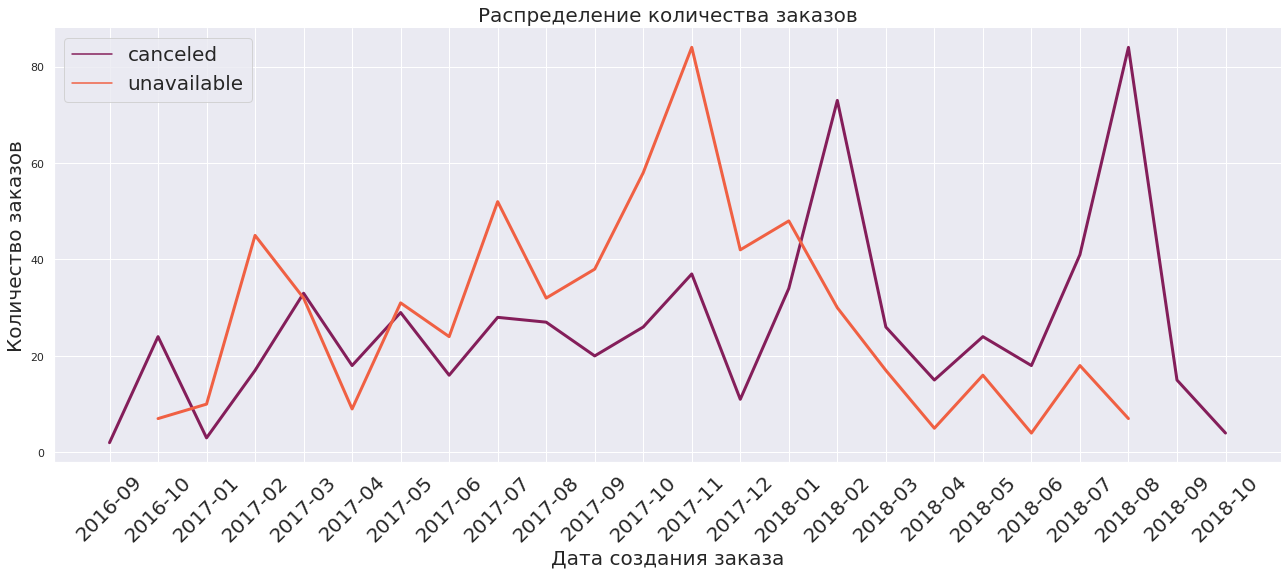

In [30]:
sns.set(style="darkgrid",
        rc={"figure.figsize": (22, 8)})
ax=sns.lineplot(data=data, x='month_create_order', y='order_id', hue='order_status', lw=3, palette='rocket')
plt.xticks(rotation=45, size=20)
plt.title('Распределение количества заказов', fontsize=20)
plt.xlabel('Дата создания заказа', fontsize=20)
plt.ylabel('Количество заказов', fontsize=20)
plt.legend(fontsize=20)
plt.grid
sns.despine()
plt.show()

На графике можем посмотреть в какой месяц сколько заказов у нас было не доставлено по причине того, что товар недоступен для покупателя unavailable или заказ отменен canceled. Можно отметить, что заказов, которые оказались недоступны стало меньше после ноября 2017 года, а отмененных заказов стало больше в 2018, особенно в феврале и августе 2018 года.

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

Объединим созданную ранее таблицу customers_orders и items по order_id как full_data.

Как и в первой задаче возьмем за покупку статусы заказов approved, processing, shipped, delivered.

Добавим колонку week_name с названиями дней недели.

In [31]:
full_data = pd.merge(customers_orders, items, how='inner', on='order_id')

status = ['approved', 'processing', 'shipped', 'delivered']
full_data = full_data.query('order_status in @status')

full_data['week_name'] = full_data.order_purchase_timestamp.dt.day_name()

Сгруппируем full_data по идентификатору товара product_id и дню недели week_name, подcчитаем количество товара для каждого дня недели, удалим индексацию, переименуем колонку order_item_id в count_product, отсортируем в порядке убывания по count_product.

In [32]:
product_by_weekname = full_data.groupby(['product_id', 'week_name'])\
            .order_item_id.count()\
            .reset_index()\
            .rename(columns={'order_item_id' : 'count_product'})\
            .sort_values('count_product', ascending=False)

product_by_weekname.head()

,product_id,week_name,count_product
15761,422879e10f46682990de24d770e7f83d,Wednesday,93
36169,99a4788cb24856965c36a24e339b6058,Monday,92
40669,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
40665,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
40670,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85


Создадим сводную таблицу, где в индексах идентификатор товара, в колонках дни недели и в значениях количество товара, купленное в этот день.

In [33]:
pivot_product_by_weekname = product_by_weekname\
            .pivot(index='product_id', columns='week_name', values='count_product').reset_index()\
            .fillna(0)
            

columns = ['product_id' , 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_product_by_weekname = pivot_product_by_weekname[columns]\
                .sort_values(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],\
                             ascending=False).reset_index(drop=True).set_index('product_id')

pivot_product_by_weekname.head(5)

week_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
product_id,,,,,,,
99a4788cb24856965c36a24e339b6058,92.0,60.0,64.0,72.0,75.0,61.0,62.0
aca2eb7d00ea1a7b8ebd4e68314663af,78.0,85.0,74.0,89.0,87.0,59.0,55.0
422879e10f46682990de24d770e7f83d,64.0,67.0,93.0,79.0,77.0,57.0,47.0
d1c427060a0f73f6b889a5c7c61f2ac4,64.0,53.0,57.0,43.0,43.0,45.0,36.0
389d119b48cf3043d311335e499d9c6b,62.0,54.0,52.0,67.0,56.0,54.0,46.0


Создадим итоговую таблицу dayweek_by_product, где для каждого товара указан день недели, когда товар покупается чаще.

In [34]:
dayweek_by_product = pivot_product_by_weekname.idxmax(axis=1).reset_index().rename(columns={0: 'day_of_week'})
dayweek_by_product.head()

,product_id,day_of_week
0,99a4788cb24856965c36a24e339b6058,Monday
1,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday
2,422879e10f46682990de24d770e7f83d,Wednesday
3,d1c427060a0f73f6b889a5c7c61f2ac4,Monday
4,389d119b48cf3043d311335e499d9c6b,Thursday


Дополнительно создадим график количества покупок всех товаров по дням недели.
Можно отметить, что в выходные у нас покупок осуществляется меньше, чем в будние дни.

In [35]:
product_by_weekname_plot = product_by_weekname.reset_index().groupby('week_name')\
                                    .count_product.count()\
                                    .reset_index()\
                                    .sort_values('count_product')

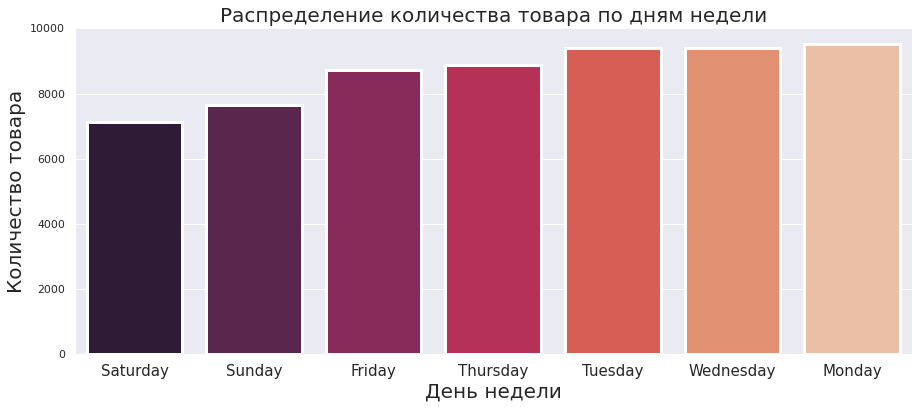

In [36]:
sns.set(style="darkgrid",
        rc={"figure.figsize": (15, 6)})
ax=sns.barplot(data=product_by_weekname_plot, x='week_name', y='count_product', lw=3, palette='rocket')
plt.xticks(size=15)
plt.title('Распределение количества товара по дням недели', fontsize=20)
plt.xlabel('День недели', fontsize=20)
plt.ylabel('Количество товара', fontsize=20)
plt.grid
sns.despine()
plt.show()

### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Начало наших данных и конец включают неполные месяцы, для корректного подсчета недель, возьмем только полные месяцы.

In [37]:
full_data['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [38]:
full_data['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

In [39]:
full_data_mean = full_data\
                .query('order_purchase_timestamp >= "2016-10-01" and order_purchase_timestamp < "2018-09-01"')

Сгруппируем данные full_data по индентификатору пользователя customer_id и и времени оформления заказа month_create_order и подсчитаем количество таких заказов, удалим индексы и отсортируем по возрастанию month_create_order.

In [40]:
order_by_week = full_data_mean.groupby(['customer_id', 'month_create_order'])\
                                        .order_id.count()\
                                        .reset_index()\
                                        .sort_values('month_create_order')

Создадим столбец order_by_week со среднем количеством покупок в неделю для каждого месяца и каждого пользователя.

In [41]:
order_by_week['order_by_week'] = order_by_week.order_id / \
                (pd.to_datetime(order_by_week.month_create_order).dt.daysinmonth / 7)

order_by_week.head()

,customer_id,month_create_order,order_id,order_by_week
35009,5bef68c4d2d04c09aee2195ff540f131,2016-10,1,0.225806
5807,0f51eea87ae9e277d0f099d51637772d,2016-10,1,0.225806
68649,b30a4d09f171b5da553bab49a0a61764,2016-10,1,0.225806
671,01be2c0c2d55c597b5ec011e26e4b0d1,2016-10,1,0.225806
57706,96fc2a988f8ec40a078ab92f1623bdd4,2016-10,1,0.225806


Из полученной таблицы order_by_week сгруппируем данные по пользователю и найдем среднее количество заказов в неделю, отсортируем и удалим индексы, далее выберем только тех пользователей, у которых в среднем два и более заказов в неделю.

In [42]:
total_order_by_week = order_by_week.groupby('customer_id')\
                                            .order_by_week.mean()\
                                            .sort_values(ascending=False)\
                                            .reset_index()

mean_orders = len(total_order_by_week.loc[total_order_by_week['order_by_week'] >= 2])

print('Количество пользователей, у которых в среднем в неделю 2 и более заказа:', mean_orders)

Количество пользователей, у которых в среднем в неделю 2 и более заказа: 28


На графике можно отметить, что в декабре 2016 у нас был резкий спад по среднему количеству заказов в неделю, что может говорить о специфике бизнеса. Характерно так же, что в феврале 2017 и 2018 годов у нас самые большие значения среднего количества заказов в неделю, что может говорить о сезонности нашего продукта. Это подтверждает так же незначительное, но снижение метрики в декабре 2017.

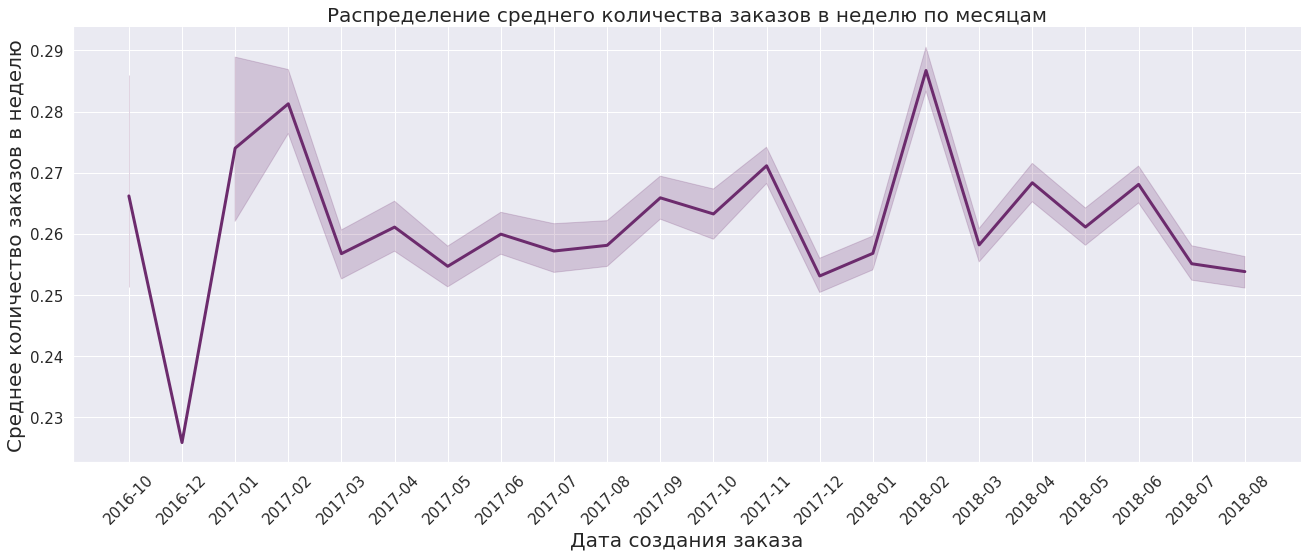

In [43]:
sns.set(style="darkgrid",
        rc={"figure.figsize": (22, 8)})

ax=sns.lineplot(data=order_by_week.sort_values('month_create_order'),
                x='month_create_order', y='order_by_week', lw=3, color='#6c2b6d')
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.title('Распределение среднего количества заказов в неделю по месяцам', fontsize=20)
plt.xlabel('Дата создания заказа', fontsize=20)
plt.ylabel('Среднее количество заказов в неделю', fontsize=20)
plt.grid
sns.despine()
plt.show()

### 5. Используя pandas, проведем когортный анализ пользователей. В период с января по декабрь выявим когорту с самым высоким retention на 3-й месяц.

Возьмем отсчет для нашего исследования с начала 2017 года, добавим немного из 2018 года, чтобы оценить когорты, которые идут последними в 2017 году.

In [44]:
min_date = '2017-01-01'
max_date = '2018-05-01'

In [45]:
full_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_create_order,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,week_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday


Создадим таблицу для удобства с двумя столбцами идентификатором пользователя customer_unique_id и временем оплаты за покупку. Выберем из данных нужный нам прмежуток, который мы задали выше, удалим индексы.

In [46]:
df = full_data[['customer_unique_id', 'order_approved_at']]
df = df\
    .query('order_approved_at >= @min_date and order_approved_at <= @max_date')\
    .reset_index(drop=True)

Добавим столбец order_purchase_date, где будет указан только год и месяц оплаты покупки.

In [47]:
df['order_purchase_date'] = df.order_approved_at\
                            .apply(lambda x: x.strftime('%Y-%m'))

Переведем customer_unique_id в индексы, чтобы мы смогли добавить новый столбец. Для каждого пользователя добавим в строку первую дату оплаты покупки, это будет first_purchase_date, удалим из индекса идентификатор пользователя и добавим столбец total_orders, пока заполненный нулями.

In [48]:
df.set_index('customer_unique_id', inplace=True)
df['first_purchase_date'] = df.groupby('customer_unique_id')['order_approved_at']\
                                    .min()\
                                    .apply(lambda x: x.strftime('%Y-%m'))
df = df.reset_index()
df['total_orders'] = 0

In [49]:
df.head()

,customer_unique_id,order_approved_at,order_purchase_date,first_purchase_date,total_orders
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,2017-05,2017-05,0
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,2018-01,2018-01,0
2,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,2018-03,2018-03,0
3,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:25:11,2017-09,2017-09,0
4,addec96d2e059c80c30fe6871d30d177,2018-02-19 14:50:37,2018-02,2018-02,0


Создадим наши когорты, сгруппировав данные по первой оплате и по оплатам в общем, выведем количество уникальных пользователей и количество заказов. Перееименуем их в users и orders.

In [50]:
cohorts = df.groupby(['first_purchase_date', 'order_purchase_date'])\
                                            .agg({'customer_unique_id': 'nunique',
                                                  'total_orders': 'count'})\
                                            .rename(columns={'customer_unique_id': 'users',
                                                             'total_orders': 'orders'})

cohorts.head(10)

users  orders
first_purchase_date order_purchase_date               
2017-01             2017-01                706     895
                    2017-02                  4       4
                    2017-03                  2       2
                    2017-04                  1       1
                    2017-05                  3       3
                    2017-06                  1       1
                    2017-07                  3       5
                    2017-08                  1       2
                    2017-09                  1       1
                    2017-11                  2       2

Создадим функцию, которая выведет месяцы, по диапазону окна в когорте.

In [51]:
def cohort_month(df):
    df['month'] = np.arange(len(df))
    return df

cohorts = cohorts.groupby('first_purchase_date').apply(cohort_month)
cohorts.head()

users  orders  month
first_purchase_date order_purchase_date                      
2017-01             2017-01                706     895      0
                    2017-02                  4       4      1
                    2017-03                  2       2      2
                    2017-04                  1       1      3
                    2017-05                  3       3      4

Заменим индексы на месяц month и когорту first_purchase_date.

In [52]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['month','first_purchase_date'], inplace=True)
cohorts.head()

,,order_purchase_date,users,orders
month,first_purchase_date,,,
0,2017-01,2017-01,706,895
1,2017-01,2017-02,4,4
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,1
4,2017-01,2017-05,3,3


Создадим ряд содержаший размер каждой когорты first_purchase_date.

In [53]:
cohort_group_size = cohorts['users'].groupby('first_purchase_date').first()
cohort_group_size.head()

first_purchase_date
2017-01     706
2017-02    1662
2017-03    2577
2017-04    2288
2017-05    3526
Name: users, dtype: int64

Создадим итоговую таблицу retention, развернув таблицу по когорте first_purchase_date, потом транспонируем ее, чтобы когорты оказались слева и выведем относительные значения для каждой строки по размеру этой когорты.

In [54]:
retention = cohorts['users'].unstack('first_purchase_date').T.divide(cohort_group_size, axis=0)
retention.head()

month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_purchase_date,,,,,,,,,,,,,,,
2017-01,1.0,0.005666,0.002833,0.001416,0.004249,0.001416,0.004249,0.001416,0.001416,0.002833,0.002833,0.007082,0.004249,0.001416,0.001416
2017-02,1.0,0.002407,0.002407,0.001805,0.004212,0.001203,0.002407,0.001805,0.000602,0.001805,0.001203,0.003008,0.001203,0.001805,0.001203
2017-03,1.0,0.005045,0.003492,0.003492,0.003492,0.001552,0.001552,0.003104,0.003104,0.001164,0.003492,0.001164,0.002328,0.001164,NaN
2017-04,1.0,0.006119,0.002185,0.001748,0.002622,0.002622,0.003497,0.002622,0.003497,0.001748,0.002185,0.000874,0.000437,NaN,NaN
2017-05,1.0,0.005389,0.004821,0.003971,0.003120,0.003403,0.004254,0.001418,0.002552,0.002552,0.002836,0.003403,NaN,NaN,NaN


Зададим график, чтобы наглядно оценить поведение когорт на 3-й месяц.

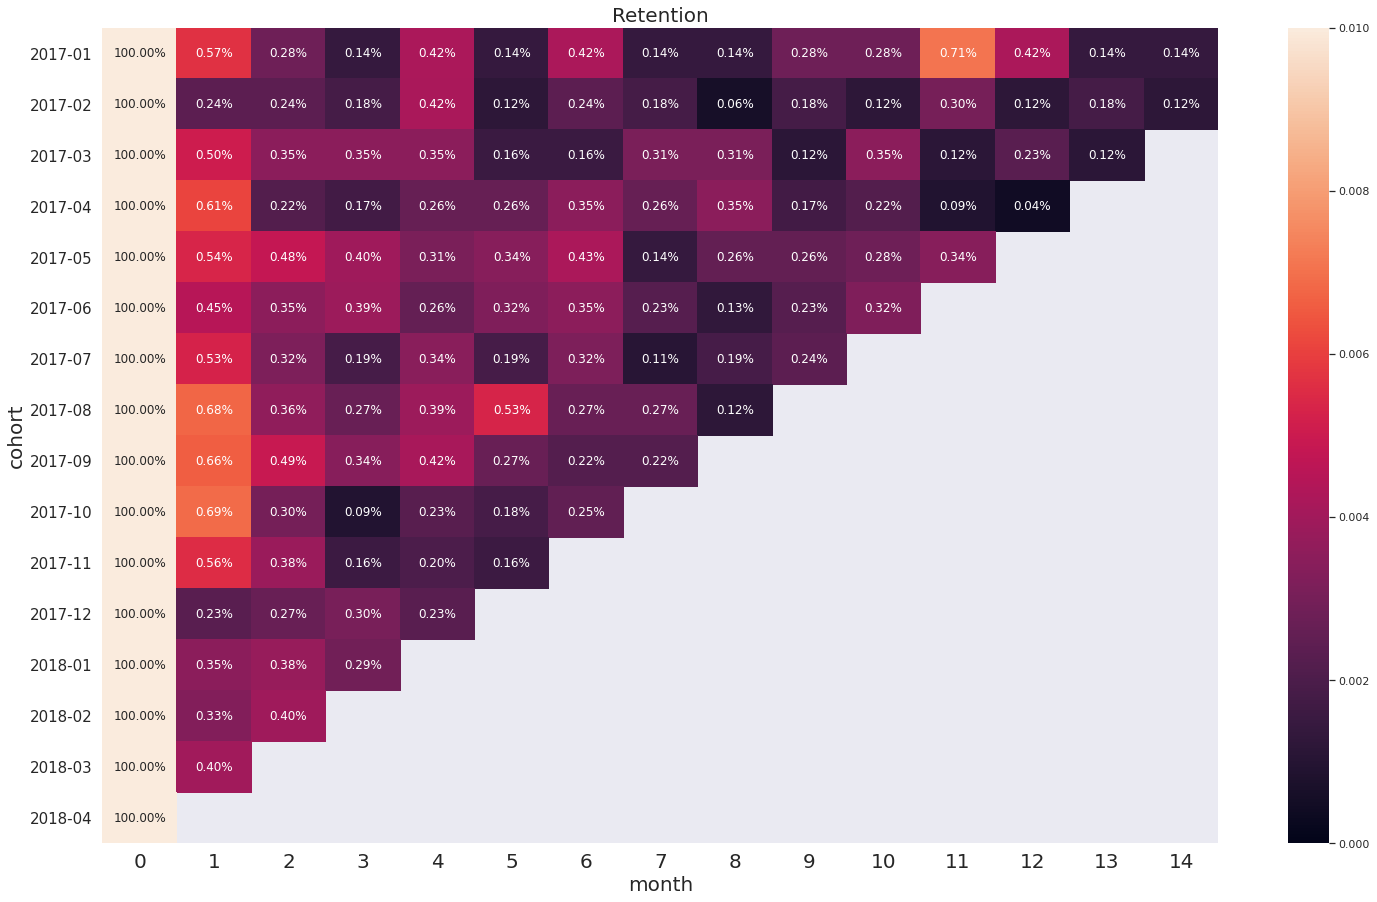

In [55]:
plt.figure(figsize=(25, 15))
plt.title('Retention', size=20)
sns.heatmap(retention, mask=retention.isnull(), annot=True, fmt='.2%', vmin=0.0, vmax=0.01)
plt.yticks(rotation=0, size=15)
plt.xticks(size=20)
plt.xlabel('month', fontsize=20)
plt.ylabel('cohort', fontsize=20)
plt.show()

In [ ]:
В результате получаем, в период с января по декабрь когорта с самым высоким retention на 3-й месяц у нас 2017-05 когорта, retention 0.40%.

### 6. RFM-сегментация пользователей

В кластеризации следующие метрики:
* R - время от последней покупки пользователя до текущей даты
* F - суммарное количество покупок у пользователя за всё время
* M - сумма покупок за всё время

In [56]:
full_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_create_order,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,week_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday


Возьмем таблицу, где мы определись с покупками, создадим таблицу rfm, где для каждого идентификатора пользователя customer_unique_id, выведем последннее время покупки, количество уникальных заказов, сумму всех покупок, удалим индексы.

In [57]:
rfm = full_data.groupby('customer_unique_id').agg({'order_approved_at': 'max',\
                                             'order_id': 'nunique',\
                                             'price': 'sum'})\
                                        .reset_index()
rfm.head()

,customer_unique_id,order_approved_at,order_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,1,180.00


Определим дату now, по которой будем судить о давности последней покупки у нашего покупателя. Для этого возьмем самую последнюю дату покупки из таблицы rfm и добавим к ней один день.

In [58]:
now = rfm['order_approved_at'].max() + timedelta(days=1)
now

Timestamp('2018-09-04 17:40:06')

В столбце order_approved_at оставим разницу в днях между покупкой и нашей датой now, переименуем колонки в названия, которые соответствуют значениям в них.

In [59]:
rfm['order_approved_at'] = rfm['order_approved_at'].apply(lambda x: (now-x).days)
rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

In [60]:
rfm.describe()

,recency,frequency,monetary
count,94665.000000,94665.000000,94665.000000
mean,243.296086,1.033793,141.866326
std,152.799168,0.210708,215.731458
min,1.000000,1.000000,0.850000
25%,119.000000,1.000000,47.800000
50%,224.000000,1.000000,89.800000
75%,352.000000,1.000000,154.910000
max,719.000000,16.000000,13440.000000


In [61]:
rfm.frequency.value_counts()

1     91794
2      2636
3       187
4        29
5         9
6         5
7         3
16        1
9         1
Name: frequency, dtype: int64

Посмотрим внимательно на распределение recency на 33-й и 66-й процентиль.

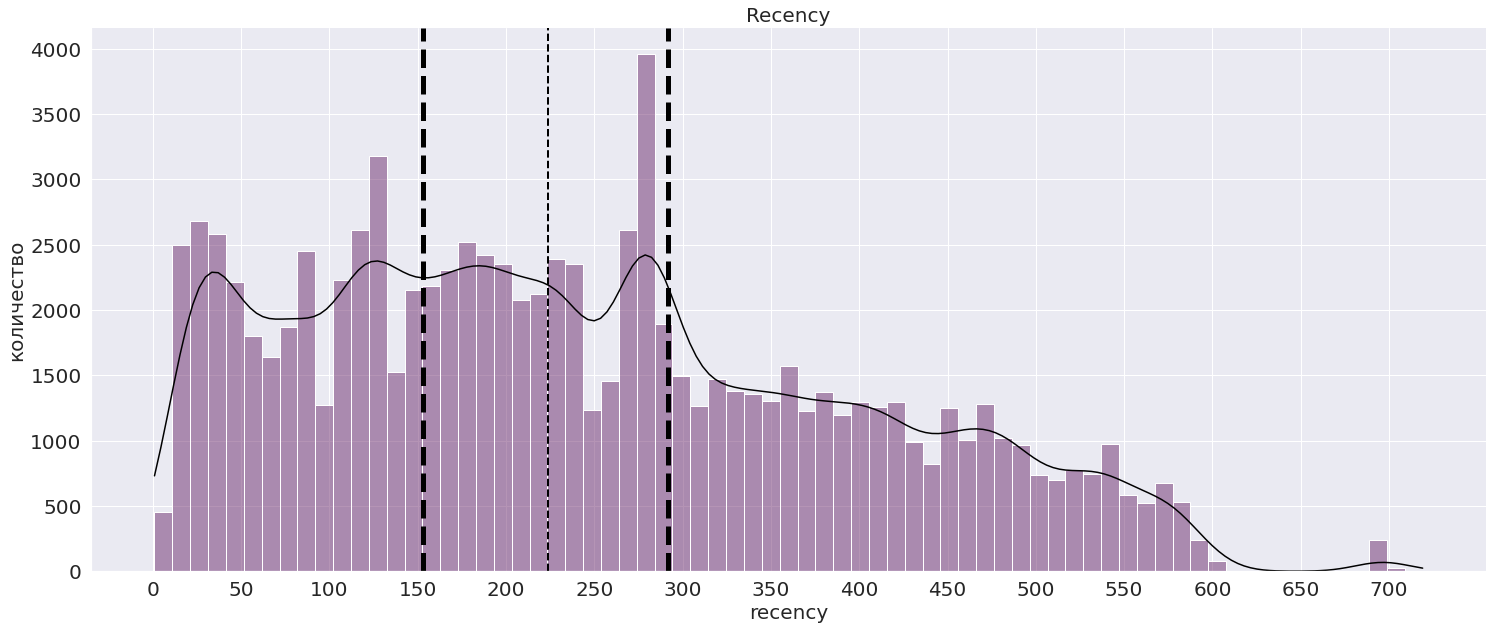

In [62]:
sns.set(style="darkgrid",
        rc={"figure.figsize": (25, 10)})
ax = sns.histplot(rfm.recency, kde=True, color='#6c2b6d')
ax.lines[0].set_color('black')
ax.set_xticks(range(0, 750, 50))

plt.axvline(x=rfm.recency.median(), color='black', ls='--', lw=2)
plt.axvline(x=rfm.recency.quantile(q=0.33), color='black', ls='--', lw=5)
plt.axvline(x=rfm.recency.quantile(q=0.66), color='black', ls='--', lw=5)

plt.title('Recency', size=20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.xlabel('recency', fontsize=20)
plt.ylabel('количество', fontsize=20)

plt.grid
sns.despine()
plt.show()

Посмотрим frequency на графике.

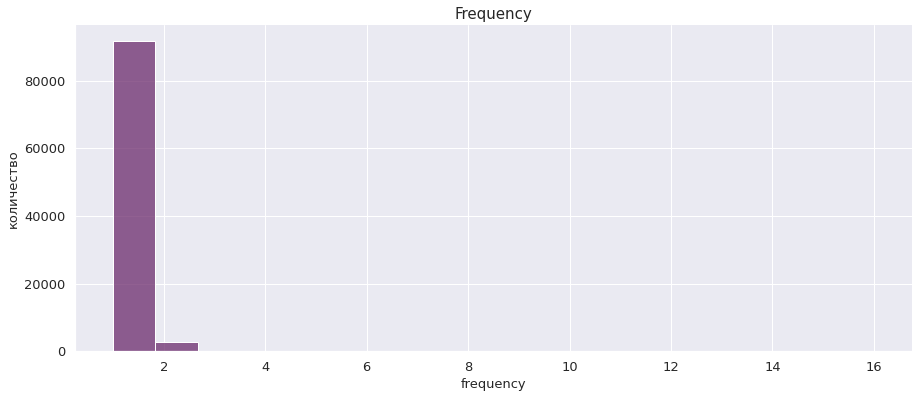

In [63]:
sns.set(style="darkgrid",
        rc={"figure.figsize": (15, 6)})
ax = sns.histplot(rfm.frequency, color='#6c2b6d')

plt.title('Frequency', size=15)
plt.yticks(size=13)
plt.xticks(size=13)
plt.xlabel('frequency', fontsize=13)
plt.ylabel('количество', fontsize=13)

plt.grid
sns.despine()
plt.show()

Посмотрим на распределение monetary, на 33-й и 66-й процентиль. Для наглядности отобразим значения меньше 1000 у.е.

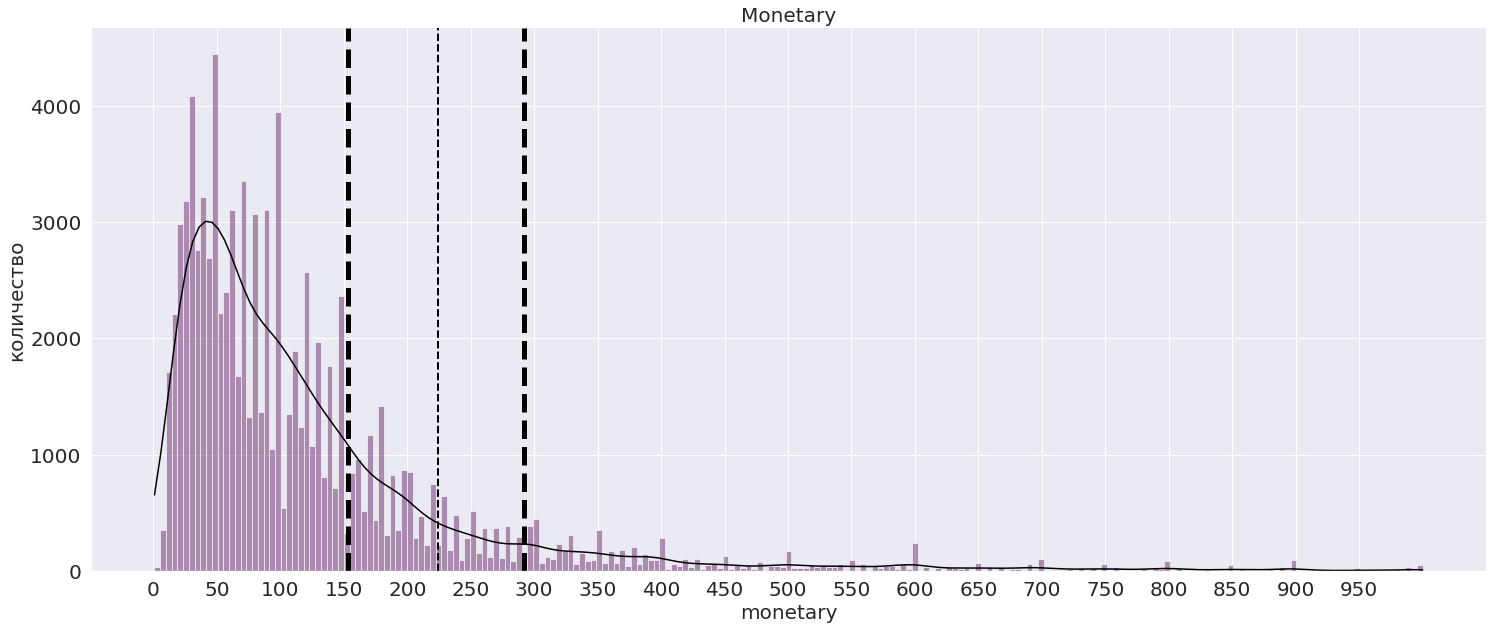

In [64]:
sns.set(style="darkgrid",
        rc={"figure.figsize": (25, 10)})
ax = sns.histplot(rfm.monetary.loc[rfm.monetary <= 1000], kde=True, color='#6c2b6d')
ax.lines[0].set_color('black')
ax.set_xticks(range(0, 1000, 50))

plt.axvline(x=rfm.recency.median(), color='black', ls='--', lw=2)
plt.axvline(x=rfm.recency.quantile(q=0.33), color='black', ls='--', lw=5)
plt.axvline(x=rfm.recency.quantile(q=0.66), color='black', ls='--', lw=5)

plt.title('Monetary', size=20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.xlabel('monetary', fontsize=20)
plt.ylabel('количество', fontsize=20)

plt.grid
sns.despine()
plt.show()

У нас большие размахи в recency и monetary, поэтому поделим пользователей на три равные части по 33-ему и 66-ому процентилям. Большинство покупателей у нас совершили только одну покупку, таких покупателей будем добавлять в один сегмент. Есть немного покупателей, которые совершили до четрых заказов, единицы совершили пять и более заказов, поэтому разделим frequency на три сегмента: от 1 заказ, от 2 до 4, от 5 заказов.

In [65]:
quintiles = rfm[['recency', 'monetary']].quantile([.33, .66])
quintiles['frequency'] = [1, 4]
quintiles = quintiles.to_dict()
quintiles

{'recency': {0.33: 153.0, 0.66: 292.0},
 'monetary': {0.33: 57.99, 0.66: 124.99},
 'frequency': {0.33: 1, 0.66: 4}}

Сегменты:
1. Recency
* Сегмент 3 - дата последней покупки меньше 153 дней назад (постоянный)
* Сегмент 2 - дата последней покупки больше 153, но меньше 292 дней назад (спящий)
* Сегмент 1 - дата последней покупки больше 292 дней (уходящий)

2. Frequency
* Сегмент 3 - покупал больше 5 раз
* Сегмент 2 - покупал от 2 до 4 раз
* Сегмент 1 - покупал 1 раз

3. Monetary
* Сегмент 3 - покупки от 125
* Сегмент 2 - покупки от 58 до 124.99
* Сегмент 1 - покупки меньше, чем 57.99

Напишем функции, чтобы разделить наши данные на сегменты, которые мы определили выше.

In [66]:
def r_score(x):
    if x <= quintiles['recency'][.33]:
        return 3
    elif x <= quintiles['recency'][.66]:
        return 2
    else:
        return 1

def fm_score(x, column):
    if x <= quintiles[column][.33]:
        return 1
    elif x <= quintiles[column][.66]:
        return 2
    else:
        return 3

Применим функции выше к нашим данным, разделим их на сегменты и соединим в общий столбец RFM для создания сегментов.

In [67]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

rfm['RFM'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,1,3,113


In [68]:
rfm.RFM.nunique()

21

Введем обозначения покупателей:

Уходящие:

* 111 Потерянные экономные
* 112, 113 Одноразовые
* 121, 122, 123 Уходящие редкие
* 131 Уходящие постоянные
* 132 Уходящие хорошие постоянные
* 133 Уходящие VIP

Спящие:

* 211, 212, 213 Спящие разовые
* 221 Спящие редкие с маленьким чеком
* 222 Спящие редкие со средним чеком
* 223 Спящие редкие с высоким чеком
* 231 Спящие постоянные с маленьким чеком
* 222 Спящие постоянные со средним чеком
* 223 Спящие постоянные с высоким чеком

Постоянные:

* 311 Новички с маленьким чеком
* 312 Новички со средним чеком
* 313 Новички с высоким чеком
* 321 Постоянные с маленьким чеком
* 322 Постоянные со средним чеком
* 323 Постоянные с высоким чеком
* 331 Постоянные с маленьким чеком
* 332 Постоянные со средним чеком
* 333 VIP



Визуализируем наши сегменты.

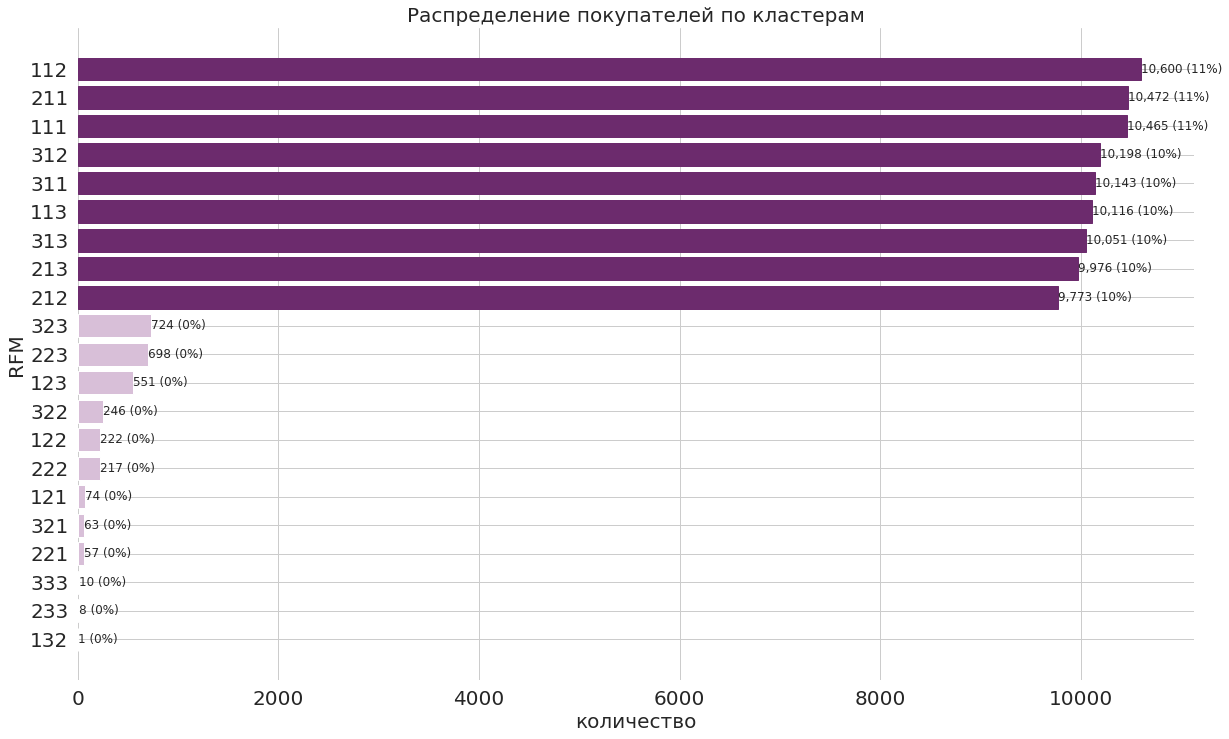

In [69]:
sns.set(
    font_scale = 1,
    style      = "whitegrid",
    rc         = {"figure.figsize": (20, 12)})

segments_counts = rfm['RFM'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
               segments_counts, color='thistle')
ax.set_frame_on(False)
ax.tick_params(left=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index, size=20)

plt.title('Распределение покупателей по кластерам', size=20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.xlabel('количество', fontsize=20)
plt.ylabel('RFM', fontsize=20)

for i, bar in enumerate(bars):
    value = bar.get_width()
    if segments_counts.index[i] in segments_counts.tail(9):
        bar.set_color('#6c2b6d')
    ax.text(value,
            bar.get_y() + bar.get_height() / 2,
            '{:,} ({:}%)'.format(int(value),
                                 int(value * 100 / segments_counts.sum())),
            va='center',
            ha='left')

sns.despine()
plt.show()

In [ ]:
### Вывод

Мы провели исследовательский анализ, чтобы понять природу на наших данных, оценили поведение покупателей. Обнаружили пропуски в данных и обработали те из них, которые были аномальные. Посмотрели, по каким причинам у нас не доставлются заказы и разобрали подробнее каждую из этих причин. 

Мы оценили динамику продаж наших пользователей и обнаружили, что большинство пользователей у нас совершили покупку один только раз. Это наблюдение нам подвтердил когортный анализ, где мы выявили чрезвычайно низкий retention для всех когорт.

Мы выполнили RFM-анализ, где разбили распределили покупателей по кластерам. На последнем графике можно выделить 9 кластеров, к которым относится большинство наших пользователей. Для каждого класетера можно осуществить ряд мероприятий, которые могут простимулировать пользователей. Разберем подробнее каждый кластер из выявленных 9.

* 112 Одноразовые, пользователи, которые совершили единожды покупку давно и потретили среднюю сумму.

* 211 Спящие разовые с маленьким чеком, эти пользователи двигаются в сторону уходящих.

* 111 Потерянные экономные, сделали покупку давно, один раз и с маленьким чеком.

* 312 Новички со средним чеком, сделали одну покупку недавно на средний чек.

* 311 Новички с маленьким чеком, сделали одну покупку недавно на маленький чек.
 
* 113 Одноразовые, как и кластер 112, они сделали одну покупку давно, но на большой чек.

* 313 Новички с высоким чеком, сделали одну покупку недавно на большой чек.

* 212 Спящие разовые со среднем чеком. 

* 213 Спящие разовые с большим чеком.


Для кластеров 112,111 и 113 не стоит тратить слишком больших усилий, так как пользователи уже ушли давно от нас и не были постоянными клиентами, можем отправить автоматическое уведомление о нас.<br>
Пользователи 211, 213, 212 еще помнят о нас, можем попробовать расшевелить их стимулирующими акциями, отправлять им рассылки с интересными акциями и выгодными предложениями.<br>
Для 312, 311 отправляем рассылки с описанием преимуществ и возможностей на нашей платформе.<br>
313 самые ценные, если их заинтересовать, они могут перерасти в VIP клиентов, поэтому им рассылаем дополнительное предложение, чтобы удержать их.